# Fisica degli Atomi Muonici

In questo esperimento per analizzare i fasci di muoni incidenti si usano due monitor nel piano $XY$, ciascuno costituito da 32 fibre scintillanti quadrate di lato 3 mm, per una lunghezza totale dell'apparato di 10 cm, lette ad una sola estremità. Il primo monitor ha le fibre orientate lungo $X$, mentre il secondo lungo $Y$.

I muoni dei raggi cosmici hanno una distribuzione di intensità data da:
$$I = I_0 \cos^2(\theta)$$
con $\theta$ angolo con l'asse $Z$ e $I_0 = 1$ muone per $cm^2$ al secondo.

Siano $N_{\gamma}$ il numero di fotoni che il passaggio di un muone genera, $fac = 4\%$ la percentuale di fotoni che raggiungono il SiPM, $L=240cm$ la lunghezza di attenuazione delle fibre, $QE$ la *quantum efficiency*, $G$ il *gain* del circuito di lettura e $Q_e$ la carica dell'elettrone, il segnale $Q$ letto dal SiPM è dato da:

$$Q=N_{\gamma}\; fac\;e^{\frac{-x}{L}}\;QE\;G\;Q_e$$

Si simuli il segnale dell'apparato per:
$$QE = 30\%,50\%$$
$$G = 10^6, 5\times10^5, 10^5$$

Assumendo che i muoni vengano generati a  $z = 15 km$ di altezza dalla superficie del monitor con un'energia di 3 GeV, e una *light yield* pari a $8\; \gamma/keV$, si può utilizzare un sistema di coordinate sferiche:
$$\begin{cases}
x &= \rho \sin\theta\cos\phi\\
y &= \rho \sin\theta\sin\phi\\
z &= \rho\cos\theta
\end{cases}$$

con:
$$\begin{cases}
|x_{max}| &= 0.05\,m\\
|y_{max}| &= 0.05\,m\\
z_{\mu} &= 15\times10^3\,m
\end{cases}\qquad\qquad
\begin{cases}
\theta &\in [0,\arcsin( \frac{\sqrt2 \; 0.05}{z_{\mu}} )]\\
\phi &\in [0,2\pi)\\
\end{cases}$$

Dove $x_{max}$ e $y_{max}$ sono date dalla dimensione del rivelatore se si fissa l'origine degli assi nel centro dello stesso e $\theta_{max}$ è dato dall'angolo tale da creare un evento nell'angolo del rivelatore.
L'angolo $\phi$ è distribuito uniforemente lungo tra 0 e $2\pi$.

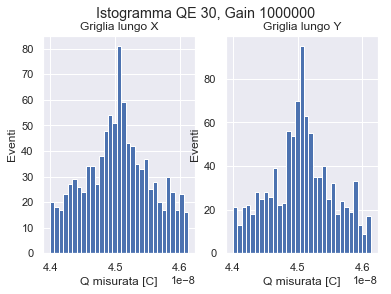

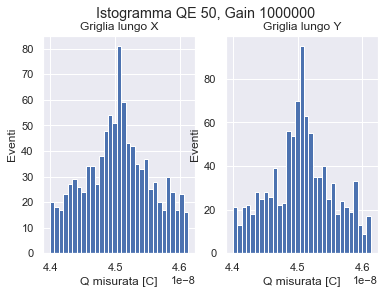

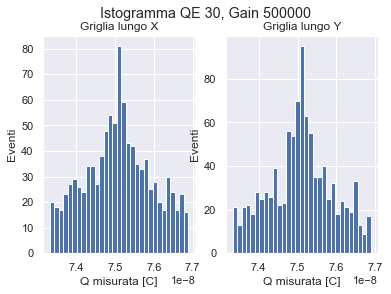

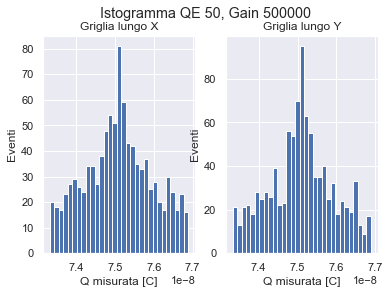

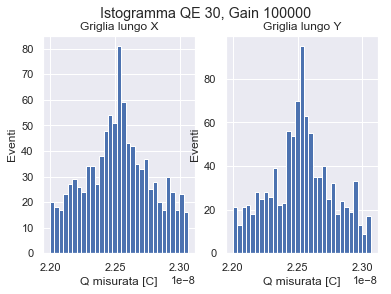

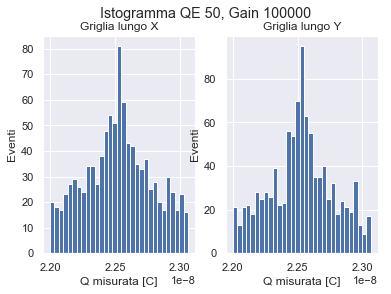

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(style="darkgrid")
np.random.seed()

secondi_di_misura =  10  # Secondi di presa dati. 
                         # Avendo un'area di 100cm^2 si avranno in media 100 eventi/s 
Eventi_Desiderati = int(100 * secondi_di_misura)


altitudine_formazione_mu = 15e3
theta_max = math.asin( (math.sqrt(2) * 0.1) / (2 * altitudine_formazione_mu) ) 
I_0 = 1    * (2./math.pi)       # Normalizzo la pdf

Energia = 3e9   #eV
light_yield = 8e-3      # ph/eV
N_gamma = Energia * light_yield   #ph/evento
fac = 0.04
L = 2.10
QE = [0.3, 0.5]
G = [1e6, 5e5, 1e5]
Carica_elettrone = 1.602e-19


Eventi = []   # Lista degli eventi
while len(Eventi) < Eventi_Desiderati:                # Genero gli eventi con metodo della reiezione
        theta = np.random.uniform(0., theta_max)
        probabilita = np.random.uniform(0.,1.)
        if probabilita < (I_0 * (math.cos(theta))**2): # I_0 * (math.cos(theta))**2 tra 0 e 1
                phi = np.random.uniform(0.,2*math.pi)
                
                # Genero le coordinate (x,y) di un evento a partire dalle coordinate sferiche
                evento = [(altitudine_formazione_mu/math.cos(theta)) * math.sin(theta) * math.cos(phi), (altitudine_formazione_mu/math.cos(theta)) * math.sin(theta) * math.sin(phi)]

                if (abs(evento[0]) < 0.05) & (abs(evento[1]) < 0.05):    #Taglio le parti di cerchio che escono dal rivelatore
                        Eventi.append(evento)
                else:
                        continue
        else:
                continue

                

                
Griglia_x = [x[0] for x in Eventi]      # Estraggo gli eventi visti dalle fibre lungo x.
Griglia_y = [y[1] for y in Eventi]      # Estraggo gli eventi visti dalle fibre lungo y.


Q_x = []        # Creo le liste contenenti le liste di segnali lungo la direzione x e y
Q_y = []


# Eseguo un ciclo for lungo i valori di G di interesse e un ciclo for annidato lungo i valori di QE
for i in range(len(G)):    
        for j in range(len(QE)):

                # Le fibre son lette da UN solo lato quindi la distanza massima dal SiPM può essere 10 cm
                # perciò eseguo uno shift dei dati di 0.05 m nel calcolo di Q, all'esponente
                # metterò (0.05 - x).
                
                # Riempio la lista Q_x con una lista contenente tutti i valori di Q misurati fissate QE e G
                Q_x.append([ ( N_gamma * fac * math.exp((0.05 - x) * (-1./L)) * QE[j] * G[i] * Carica_elettrone ) for x in Griglia_x ])

                # Plotto il risultato
                plt.subplot(121)
                bins = np.linspace(min(Q_x[i]),max(Q_x[i]),32)
                plt.hist(Q_x[i], bins, label = "Griglia X")
                plt.xlabel('Q misurata [C]')
                plt.ylabel('Eventi')
                plt.title("Griglia lungo X")

                
                # Riempio la lista Q_y con una lista contenente tutti i valori di Q misurati fissate date QE e G  
                Q_y.append([ ( N_gamma * fac * math.exp((0.05 - y) * (-1./L)) * QE[j] * G[i] * Carica_elettrone ) for y in Griglia_y ])

                # Plotto il risultato
                plt.subplot(122)
                bins = np.linspace(min(Q_y[i]),max(Q_y[i]),32)
                plt.hist(Q_y[i], bins, label="Griglia Y")
                plt.xlabel('Q misurata [C]')
                plt.ylabel('Eventi')
                plt.title("Griglia lungo Y")

                
                
                plt.suptitle('Istogramma QE %i, Gain %i' %(QE[j]*100, G[i]) )
                plt.show()
